In [1]:
# Append src directory to path
import sys
sys.path.append('C:\\Users\\kingt\\Dropbox\\Programming\\NeuralSimV3\\NeuroSimV3\\python\\src')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt


from neuron_population import NeuronPopulation
from connectome import Connectome
from overhead import Simulation

In [4]:
dt = 0.1

In [5]:
# Neuron population parameters
layer_distribution = [2, 12, 2]
n_layers = 3
neuron_types = ["TRN", "p23", "nb"]
n_neuron_types = len(neuron_types)
inhibitory = [False, False, True]
dist_layer1 = np.array([1, 0, 0])
dist_layer2 = np.array([0, 8, 2])
dist_layer3 = np.array([1, 0, 0])
neuron_distribution = [dist_layer1, dist_layer2, dist_layer3]
threshold_decay = np.exp(-dt / 5)

In [6]:
neuron_pop = NeuronPopulation(
    layer_distribution,
    neuron_distribution,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.15
)

In [7]:
# Connectome
max_synapses = 12
synapse_strength = np.ones((n_layers, n_layers))
# neuron_types = ["p23", "TRN", "b", "nb"]
connectivity_probability = np.ones((n_layers, n_layers, n_neuron_types, n_neuron_types+2))


connectivity_probability[:,:,:,-2] = 0.0  # Self connections
connectivity_probability[:,:,:,-1] = 0.0  # No empty connections
# No inter-connections for input and output layers
connectivity_probability[0, 0, :, :-2] = 0
connectivity_probability[2, 2, :, :-2] = 0
# Only flow in one direction
connectivity_probability[1, 0, :, :-2] = 0.0
connectivity_probability[2, 1, :, :-2] = 0.0
connectivity_probability[2, 0, :, :-2] = 0.0
# No jump from input to output
connectivity_probability[0, 2, :, :-2] = 0.0

In [8]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    connectivity_probability,
    synapse_strength,
)

In [9]:
connectome.evaluate_small_world()

Sigma (small-world if > 1): 1.0569
Omega (small-world if close to 0): -0.1547


(1.0568998822682227, -0.15465784215784217)

In [10]:
connectome.interactive()

connectome.html
Saved interactive graph to connectome.html


In [11]:
connectome.M

array([[10,  2, 10, 11, 11, 12, 13, 10,  7, 13,  3, 11],
       [11,  9,  9,  6,  7,  2,  5,  4,  9, 12,  7, 10],
       [15, 14,  8,  8,  9, 14,  7,  8, 11, 15, 13,  6],
       [ 6,  5,  7,  4,  5,  2,  6, 11,  7, 14, 15,  5],
       [ 8, 14,  5,  3, 11, 10, 14, 11, 10,  2, 12, 10],
       [10,  3,  6,  9,  9,  9,  2,  9,  6,  2,  3,  6],
       [ 7, 14,  2, 13, 10,  4, 14,  5, 14, 12,  8,  3],
       [15, 10,  6, 13, 10,  5, 14, 11, 10,  8,  9,  2],
       [11,  9, 10,  6,  6, 14, 15,  2, 14, 11, 12, 15],
       [ 4, 10, 14, 13, 10, 10,  3, 15,  4,  3,  5,  7],
       [ 2,  6,  8,  7, 11,  2,  5,  8,  4, 13,  7,  8],
       [ 4, 14,  6,  4, 10, 10,  8,  7,  7, 15, 12,  3],
       [15,  9, 15, 15,  2, 14, 11, 13,  3,  2,  7,  6],
       [ 7,  4, 11, 11,  4, 12,  6, 11, 14,  6,  6,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [12]:
connectome.NC

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False

In [13]:
outw, inw, total = connectome.connections_per_neuron()
print("Connections per neuron:")
print("Out:", outw)
print("In:", inw)
print("Total:", total)

Connections per neuron:
Out: [12 12 12 12 12 12 12 12 12 12 12 12 12 12  0  0]
In: [ 0  0 10  7  7  7 10 10  6  6  9 10  7  7 10  7]
Total: [12 12 22 19 19 19 22 22 18 18 21 22 19 19 10  7]


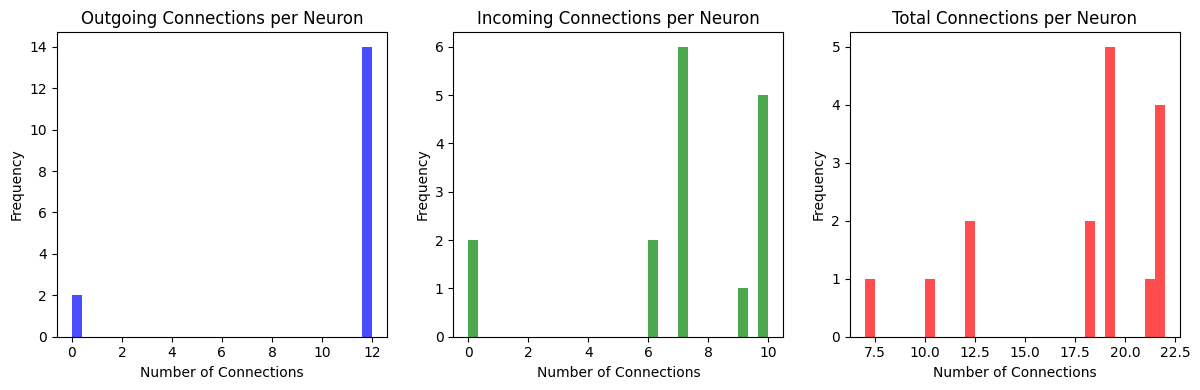

In [14]:
# Plot 3 connections histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(outw, bins=30, color='blue', alpha=0.7, label='Outgoing')
plt.title('Outgoing Connections per Neuron')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
plt.hist(inw, bins=30, color='green', alpha=0.7, label='Incoming')
plt.title('Incoming Connections per Neuron')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
plt.hist(total, bins=30, color='red', alpha=0.7, label='Total')
plt.title('Total Connections per Neuron')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
# connectome.distances

In [16]:
sim = Simulation(connectome, dt, stepper_type="adapt")
sim.plasticity.mirror_neurons = [(0, -2), (1, -1)]

In [17]:
weights_t0 = connectome.W.copy()

In [18]:
# connectome.W.copy()

In [19]:
I_ext = np.zeros((neuron_pop.n_neurons))
I_ext[1] = 100
I_ext[2:-2] = 50

# I_ext = 100

for i in range(50000):
    sim.step(I_ext=I_ext)

weights_t1 = connectome.W.copy()

In [20]:
# sim.plasticity.A = 0.0

In [21]:
I_ext = np.zeros((neuron_pop.n_neurons))
I_ext[0] = 100
I_ext[2:-2] = 50

# I_ext = 100

for i in range(50000):
    sim.step(I_ext=I_ext)

weights_t1 = connectome.W.copy()

In [22]:
# sim.plasticity.activity_trace

In [23]:
sim.synapse_dynamics.g_GABA_A
sim.synapse_dynamics.g_NMDA

array([0.        , 0.        , 0.62968699, 1.18663353, 0.15401487,
       0.06350606, 0.10449741, 0.45102343, 0.16155622, 0.10387199,
       1.10252551, 0.73380215, 0.80748473, 0.57714524, 0.17856736,
       0.50992712])

In [24]:
neuron_pop.inhibitory_mask

array([False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [25]:
sim.neuron_states.V

array([-66.14730444, -59.98139614, -60.20432109, -57.19561604,
       -60.02342804, -57.96450205, -58.75827411, -58.21915177,
       -57.83124144, -58.33879649, -57.35668293, -59.03527508,
       -58.88442596, -57.2737195 , -61.27932064, -61.01361469])

In [26]:
weights_t1 # [neuron_pop.inhibitory_mask]

array([[0.25503436, 0.27004725, 0.26795356, 0.03111429, 0.        ,
        0.43452093, 0.05642794, 0.04594904, 0.11133589, 0.20791313,
        0.63195897, 0.27340589],
       [0.2464037 , 0.00279237, 0.17038142, 0.08474379, 0.09008363,
        0.1372486 , 0.09323208, 0.17411231, 0.12606692, 0.31420127,
        0.25140868, 0.13402671],
       [0.26871929, 0.2204196 , 0.58457826, 0.44661705, 0.02240431,
        0.43966379, 0.65992616, 0.51642672, 0.38073239, 0.24644022,
        0.43942521, 0.28708352],
       [0.2653216 , 0.16314345, 0.05080189, 0.36570878, 0.09900142,
        0.35685833, 0.45217912, 0.05456264, 0.        , 0.27968412,
        0.43263281, 0.33139877],
       [0.34011744, 0.24758435, 0.61199043, 0.49230851, 0.        ,
        0.11840475, 0.25016099, 0.42354321, 0.1705493 , 0.36174658,
        0.65989953, 0.18774338],
       [0.36742204, 0.37065743, 0.33577841, 0.59201959, 0.42407636,
        0.06700249, 0.38263147, 0.08650248, 0.19530861, 0.20416053,
        0.18430233,

In [27]:
weights_t1 -   weights_t0

array([[-0.93902944, -0.80996167, -0.98659756, -0.08218654,  0.        ,
        -0.57543166, -0.08396445, -0.1691831 , -0.2964623 , -0.30937357,
        -0.92566282, -0.72218531],
       [-1.41118197, -0.01561444, -0.95274142, -0.62920939, -0.57704757,
        -0.82305171, -0.27726936, -0.93112529, -0.70494295, -0.85447806,
        -1.61044536, -1.09258948],
       [-0.33608391, -0.54928134, -0.93709958, -0.71594289, -0.04106427,
        -1.09563357, -1.50562052, -0.82785025, -0.77068576, -0.30821975,
        -0.49955755, -0.73009883],
       [-0.85001062, -0.2790557 , -0.12836209, -0.88459657, -0.16934122,
        -0.95780865, -1.44864593, -0.13256475,  0.        , -0.50727931,
        -0.7039981 , -0.56685521],
       [-0.67005469, -0.76969609, -0.93409911, -0.94741534,  0.        ,
        -0.43409651, -0.77770643, -1.07581411, -0.62526933, -0.94582324,
        -0.80184094, -0.68830641],
       [-1.50368878, -0.80652293, -1.21936976, -1.63970425, -1.17455541,
        -0.18557538, -

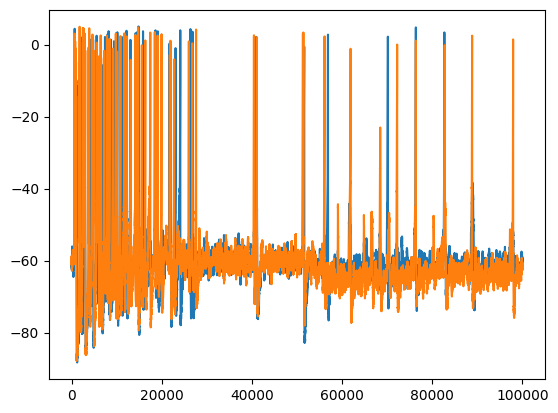

In [28]:
plt.plot(np.array(sim.stats.Vs)[:, neuron_pop.get_neurons_from_layer(2)])
plt.show()

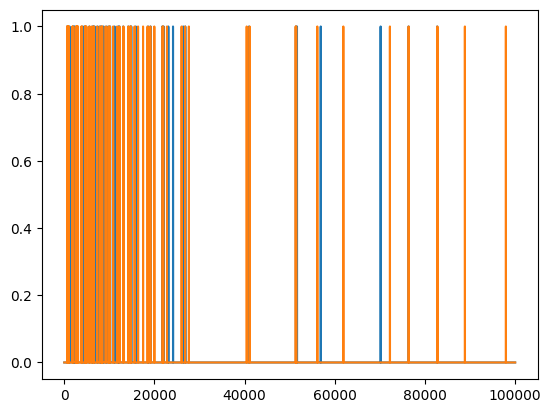

In [29]:
plt.plot(np.array(sim.stats.spikes)[:, neuron_pop.get_neurons_from_layer(2)])
plt.show()